In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
mouse_drug_clin_trial_merge_df = pd.merge(clinical_trial_data_df, mouse_drug_data_df, on="Mouse ID", how="outer")

# Reduced combined data set to selected Drugs

drugs = ['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn','Zoniferol']
mouse_drug_clin_trial_merge_df_reduce = mouse_drug_clin_trial_merge_df[~mouse_drug_clin_trial_merge_df.Drug.isin(drugs)]
mouse_drug_clin_trial_merge_df_reduce

# Display the data table for preview

mouse_drug_clin_trial_merge_df.sort_values("Timepoint").head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


In [2]:
# Data table for preview WITH SELECTED DRUGS

mouse_drug_clin_trial_merge_df_reduce.sort_values("Timepoint").head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
244,k483,0,45.0,0,Infubinol
1278,i477,0,45.0,0,Placebo
1271,o302,0,45.0,0,Placebo
1838,g288,0,45.0,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mean_tumor_volume = mean_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_vol_group_drug_TP_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint WITH SELECTED DRUGS

mean_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df_reduce.groupby(["Drug", "Timepoint"])
mean_tumor_volume = mean_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_vol_group_drug_TP_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
sem_tumor_volume = sem_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].sem()
sem_tumor_volume

# Convert to DataFrame

sem_tumor_vol_group_drug_TP_df = pd.DataFrame(sem_tumor_volume).reset_index()

# Preview DataFrame

sem_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint WITH SELECTED DRUGS

sem_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df_reduce.groupby(["Drug", "Timepoint"])

sem_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames

tumor_vol_group_drug_TP_df_pivot = mean_tumor_vol_group_drug_TP_df.pivot_table(index='Timepoint', columns='Drug')


# Preview that Reformatting worked

tumor_vol_group_drug_TP_df_pivot

Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589
10                 43.084291  49.403909  49.582269  49.423329
15                 42.064317  51.296397  52.399974  51.359742
20                 40.716325  53.197691  54.920935  54.364417
25                 39.939528  55.715252  57.678982  57.482574
30                 38.769339  58.299397  60.994507  59.809063
35                 37.816839  60.742461  63.371686  62.420615
40                 36.958001  63.162824  66.068580  65.052675
45                 36.236114  65.755562  70.662958  68.084082

In [8]:
# Minor Data Munging to Re-Format the Data Frames WITH SELECTED DRUGS

tumor_vol_group_drug_TP_df_pivot = mouse_drug_clin_trial_merge_df_reduce.pivot_table(index='Timepoint', columns='Drug')

# Preview that Reformatting worked

tumor_vol_group_drug_TP_df_pivot

Metastatic Sites                               Tumor Volume (mm3)  \
Drug             Capomulin Infubinol  Ketapril   Placebo          Capomulin   
Timepoint                                                                     
0                 0.000000  0.000000  0.000000  0.000000          45.000000   
5                 0.160000  0.280000  0.304348  0.375000          44.266086   
10                0.320000  0.666667  0.590909  0.833333          43.084291   
15                0.375000  0.904762  0.842105  1.250000          42.064317   
20                0.652174  1.050000  1.210526  1.526316          40.716325   
25                0.818182  1.277778  1.631579  1.941176          39.939528   
30                1.090909  1.588235  2.055556  2.266667          38.769339   
35                1.181818  1.666667  2.294118  2.642857          37.816839   
40                1.380952  2.100000  2.733333  3.166667          36.958001   
45                1.476190  2.111111  3.363636  3.272727          36.236114   

                                            
Drug       Infubinol   Ketapril    Placebo  
Timepoint                                   
0          45.000000  45.000000  45.000000  
5          47.062001  47.389175  47.125589  
10         49.403909  49.582269  49.423329  
15         51.296397  52.399974  51.359742  
20         53.197691  54.920935  54.364417  
25         55.715252  57.678982  57.482574  
30         58.299397  60.994507  59.809063  
35         60.742461  63.371686  62.420615  
40         63.162824  66.068580  65.052675  
45         65.755562  70.662958  68.084082

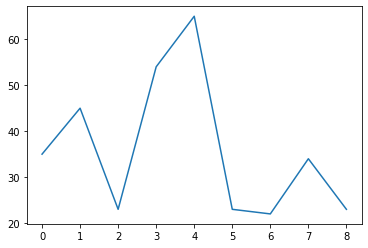

In [10]:
# Generate the Plot (with Error Bars)

#fig, ax = plt.subplots()

x_axis = np.arange(0, len('Timepoint'))
y_axis = [35,45,23,54,65,23,22,34,23]
plt.plot(x_axis, y_axis)
#plt.legend(loc="best")


#ax.errorbar(x_axis, mean_tumor_volume, yerr=sem_tumor_volume, fmt="o")

plt.show()

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_meta_sites_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mean_meta_sites = mean_meta_sites_grouped_drug_TP["Metastatic Sites"].mean()

# Convert to DataFrame

mean_meta_sites_grouped_drug_TP_df = pd.DataFrame(mean_meta_sites).reset_index()

# Preview DataFrame
mean_meta_sites_grouped_drug_TP_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_meta_sites_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
sem_meta_sites = sem_meta_sites_grouped_drug_TP["Tumor Volume (mm3)"].sem()
sem_meta_sites

# Convert to DataFrame

sem_meta_sites_grouped_drug_TP_df = pd.DataFrame(sem_meta_sites).reset_index()

# Preview DataFrame
sem_meta_sites_grouped_drug_TP_df.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

mean_meta_sites_group_drug_TP_df_pivot = mean_meta_sites_grouped_drug_TP_df.pivot_table(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
mean_meta_sites_group_drug_TP_df_pivot

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mouse_count = mouse_count_grouped_drug_TP["Mouse ID"].count()
#mouse_count

# Convert to DataFrame

mouse_count_df = pd.DataFrame(mouse_count).reset_index()

# Preview DataFrame
mouse_count_df

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

mouse_count_df_pivot = mouse_count_df.pivot_table(index='Timepoint', columns='Drug')

# Preview the Data Frame
mouse_count_df_pivot

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)